## A news value maximiser

 Politically and commercially affiliated media companies are tasked with maximizing the views for certain articles more than others. Build a system that maximises the views for these “aligned” articles using K-Arm Bandit.

Each article becomes an "arm" in the K-arm bandit.

The reward is the number of views an article receives.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [133]:
#parameters
num_articles = 10
aligned_bias = 1.5    # Extra reward for aligned articles
epsilon = 0.01          # Exploration rate for ε-greedy
iterations = 10000      # Total promotion iterations

In [135]:
# Set up articles (0-9) with a subset marked as "aligned"
articles = list(range(num_articles))
aligned_articles = {0, 1, 2}  # Example set of aligned article IDs

In [137]:
# Initialize tracking structures
views = {article_id: 0 for article_id in articles}       # Track total views (rewards) per article
counts = {article_id: 0 for article_id in articles}      # Track number of times each article is promoted
reward_history = {article_id: [] for article_id in articles}  # Store cumulative reward over time

In [139]:
# Function to simulate promoting an article and getting views
def promote_article_and_get_views(article_id):
    # Simulate view counts (rewards) with higher views for aligned articles
    base_views = np.random.poisson(10)   # Base view count
    if article_id in aligned_articles:
        return base_views * aligned_bias
    else:
        return base_views

In [141]:
# Epsilon-Greedy Bandit Algorithm with Bias for Aligned Articles
for t in range(iterations):
    # Decide if we explore or exploit
    if random.random() < epsilon:
        # Exploration: choose a random article
        selected_article = random.choice(articles)
    else:
        # Exploitation: choose the article with the highest average view count (biased for aligned articles)
        max_value = float('-inf')
        selected_article = None
        
        for article_id in articles:
            if counts[article_id] == 0:
                # Avoid dividing by zero for unpromoted articles
                estimated_value = float('inf')
            else:
                # Calculate average views and apply bias for aligned articles
                mean_reward = views[article_id] / counts[article_id]
                if article_id in aligned_articles:
                    estimated_value = mean_reward + aligned_bias
                else:
                    estimated_value = mean_reward
            
            # Select article with highest estimated value
            if estimated_value > max_value:
                max_value = estimated_value
                selected_article = article_id
    
    # Promote the selected article and get the "reward" (simulated views)
    reward = promote_article_and_get_views(selected_article)
    views[selected_article] += reward
    counts[selected_article] += 1
    
    # Update cumulative reward for plotting
    for article_id in articles:
        if len(reward_history[article_id]) == 0:
            reward_history[article_id].append(views[article_id])
        else:
            reward_history[article_id].append(reward_history[article_id][-1] + (reward if article_id == selected_article else 0))

In [149]:
print("Article Promoted:")
for article_id in articles:
    avg_views = views[article_id] / counts[article_id] if counts[article_id] > 0 else 0
    print(f"Article {article_id}: Promoted {counts[article_id]} times, Total Views: {views[article_id]}, Average Views: {avg_views:.2f}")

Article Promoted:
Article 0: Promoted 2 times, Total Views: 22.5, Average Views: 11.25
Article 1: Promoted 9988 times, Total Views: 150505.5, Average Views: 15.07
Article 2: Promoted 3 times, Total Views: 36.0, Average Views: 12.00
Article 3: Promoted 1 times, Total Views: 6, Average Views: 6.00
Article 4: Promoted 1 times, Total Views: 6, Average Views: 6.00
Article 5: Promoted 1 times, Total Views: 9, Average Views: 9.00
Article 6: Promoted 1 times, Total Views: 10, Average Views: 10.00
Article 7: Promoted 1 times, Total Views: 8, Average Views: 8.00
Article 8: Promoted 1 times, Total Views: 11, Average Views: 11.00
Article 9: Promoted 1 times, Total Views: 8, Average Views: 8.00


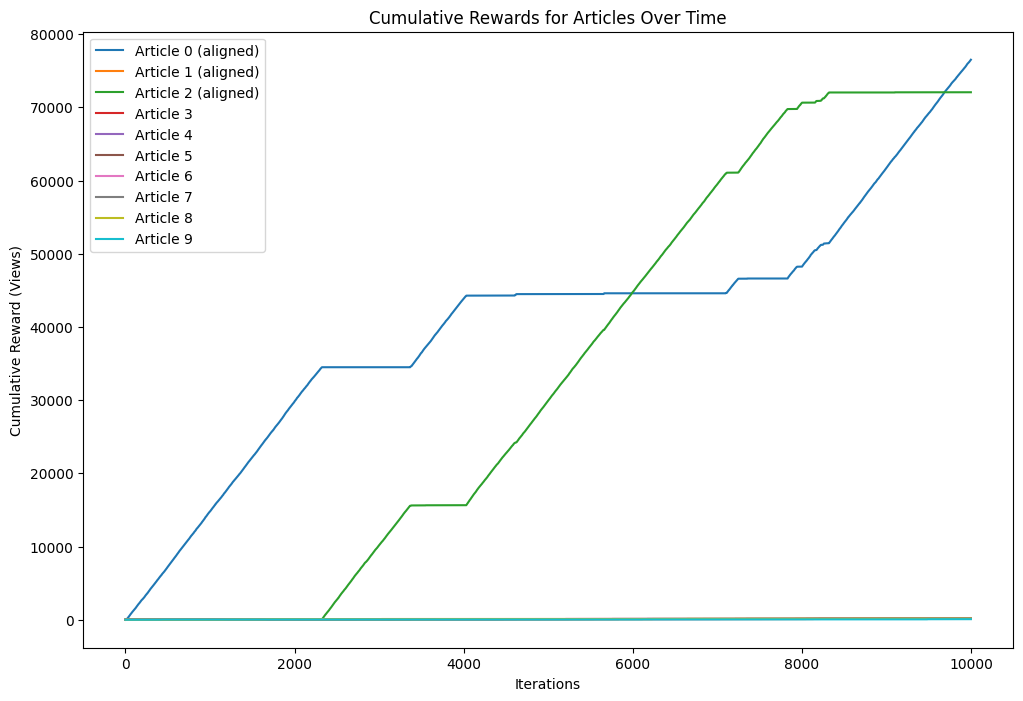

In [144]:
# Plot cumulative rewards over time
plt.figure(figsize=(12, 8))
for article_id in articles:
    plt.plot(reward_history[article_id], label=f'Article {article_id} {"(aligned)" if article_id in aligned_articles else ""}')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward (Views)')
plt.title('Cumulative Rewards for Articles Over Time')
plt.legend()
plt.show()